In [1]:
%matplotlib inline


Finding a minimum in a flat neighborhood
=========================================

An excercise of finding minimum. This excercise is hard because the
function is very flat around the minimum (all its derivatives are zero).
Thus gradient information is unreliable.

The function admits a minimum in [0, 0]. The challenge is to get within
1e-7 of this minimum, starting at x0 = [1, 1].

The solution that we adopt here is to give up on using gradient or
information based on local differences, and to rely on the Powell
algorithm. With 162 function evaluations, we get to 1e-8 of the
solution.



In [2]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

def f(x):
    return np.exp(-1/(.01*x[0]**2 + x[1]**2))

# A well-conditionned version of f:
def g(x):
    return f([10*x[0], x[1]])

# The gradient of g. We won't use it here for the optimization.
def g_prime(x):
    r = np.sqrt(x[0]**2 + x[1]**2)
    return 2/r**3*g(x)*x/r

result = optimize.minimize(g, [1, 1], method="Powell", tol=1e-10)
x_min = result.x

Some pretty plotting



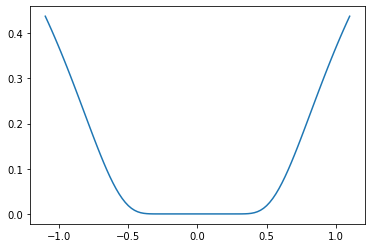

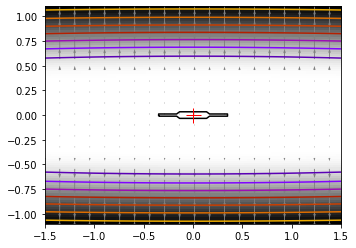

In [3]:
plt.figure(0)
plt.clf()
t = np.linspace(-1.1, 1.1, 100)
plt.plot(t, f([0, t]))

plt.figure(1)
plt.clf()
X, Y = np.mgrid[-1.5:1.5:100j, -1.1:1.1:100j]
plt.imshow(f([X, Y]).T, cmap=plt.cm.gray_r, extent=[-1.5, 1.5, -1.1, 1.1],
          origin='lower')
plt.contour(X, Y, f([X, Y]), cmap=plt.cm.gnuplot)

# Plot the gradient
dX, dY = g_prime([.1*X[::5, ::5], Y[::5, ::5]])
# Adjust for our preconditioning
dX *= .1
plt.quiver(X[::5, ::5], Y[::5, ::5], dX, dY, color='.5')

# Plot our solution
plt.plot(x_min[0], x_min[1], 'r+', markersize=15)

plt.show()